In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [20]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
type(cancer['data'])

numpy.ndarray

In [24]:
cancer['data'].shape

(569, 30)

In [25]:
import pandas as pd
df = pd.DataFrame({'featuare name': cancer.feature_names, 
                   'max': cancer.data.max(axis = 0), 
                   'min': cancer.data.min(axis = 0)})
print(df)

"""cancer_max= cancer.data.max(axis = 0)
for score in cancer_max:
    print("{:.3f}".format(score))"""

              featuare name         max         min
0               mean radius    28.11000    6.981000
1              mean texture    39.28000    9.710000
2            mean perimeter   188.50000   43.790000
3                 mean area  2501.00000  143.500000
4           mean smoothness     0.16340    0.052630
5          mean compactness     0.34540    0.019380
6            mean concavity     0.42680    0.000000
7       mean concave points     0.20120    0.000000
8             mean symmetry     0.30400    0.106000
9    mean fractal dimension     0.09744    0.049960
10             radius error     2.87300    0.111500
11            texture error     4.88500    0.360200
12          perimeter error    21.98000    0.757000
13               area error   542.20000    6.802000
14         smoothness error     0.03113    0.001713
15        compactness error     0.13540    0.002252
16          concavity error     0.39600    0.000000
17     concave points error     0.05279    0.000000
18          

'cancer_max= cancer.data.max(axis = 0)\nfor score in cancer_max:\n    print("{:.3f}".format(score))'

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("train score", tree.score(X_train, y_train))
print("test score", tree.score(X_test, y_test))


train score 1.0
test score 0.9370629370629371


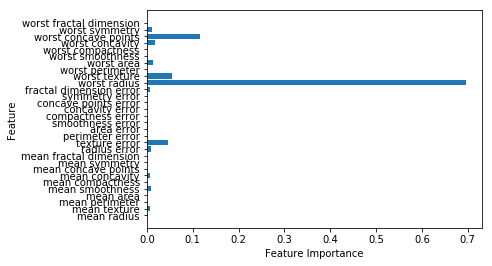

In [9]:
def plot_feature_impotances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_impotances_cancer(tree)


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


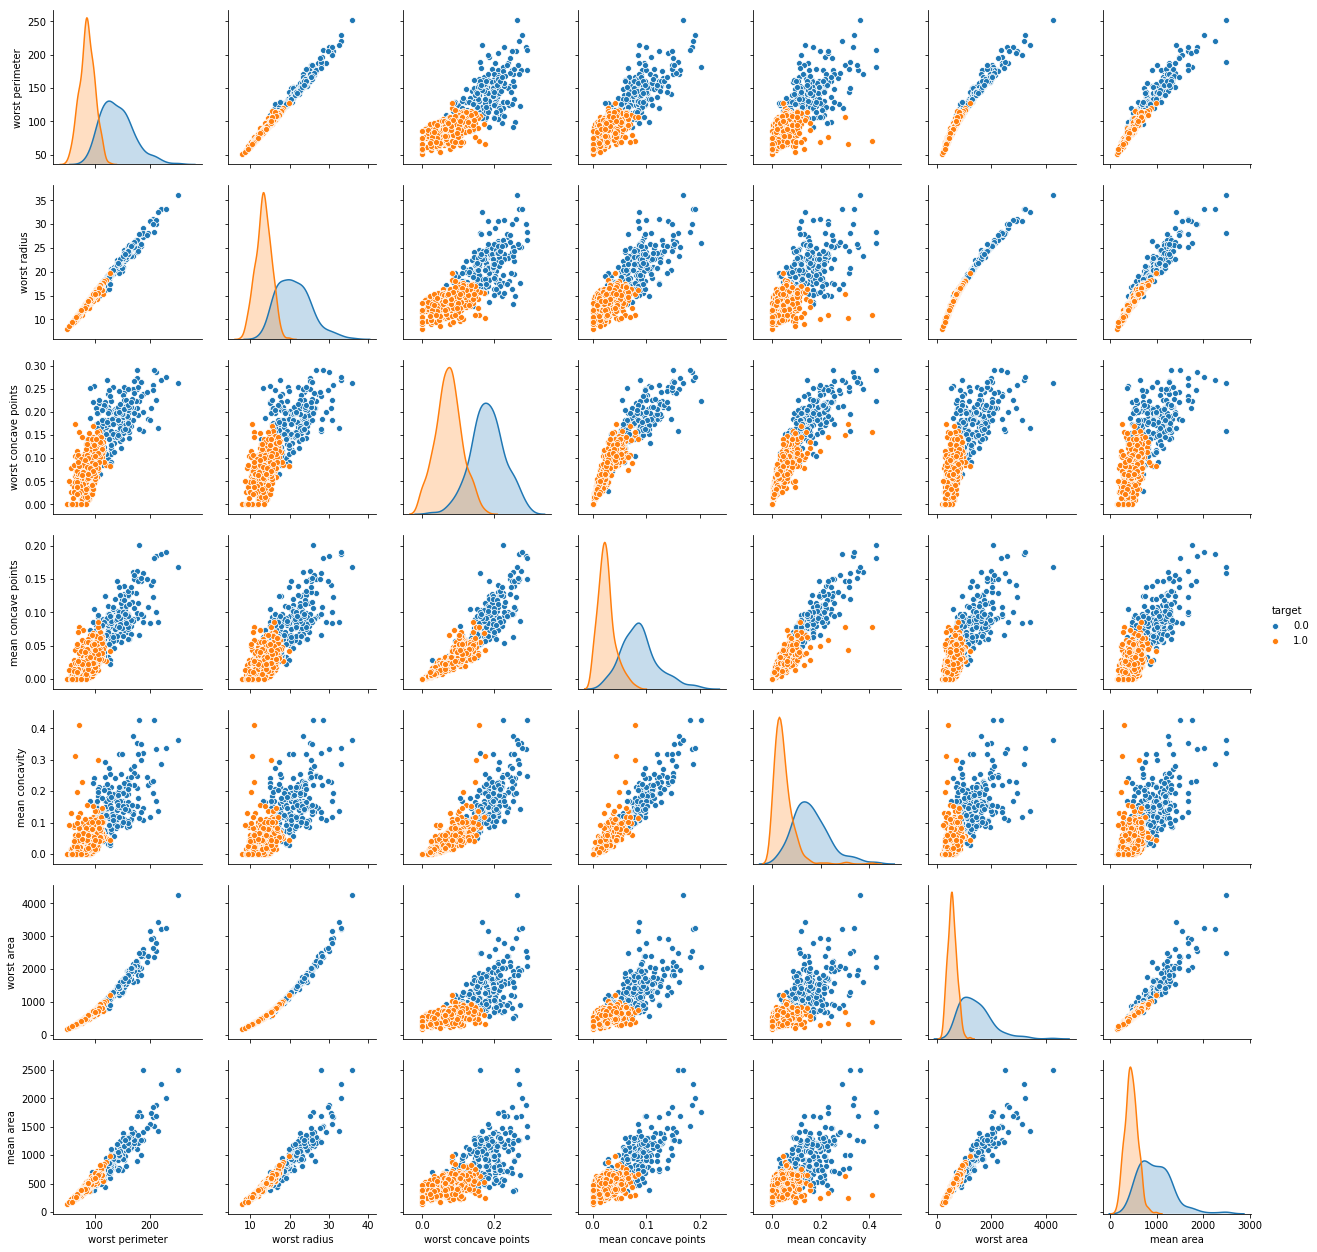

In [12]:
#picked the 7 most important features via RamdomForest
sns.pairplot(df_cancer, hue = 'target', vars = ['worst perimeter','worst radius','worst concave points','mean concave points',
                                              'mean concavity','worst area','mean area'])


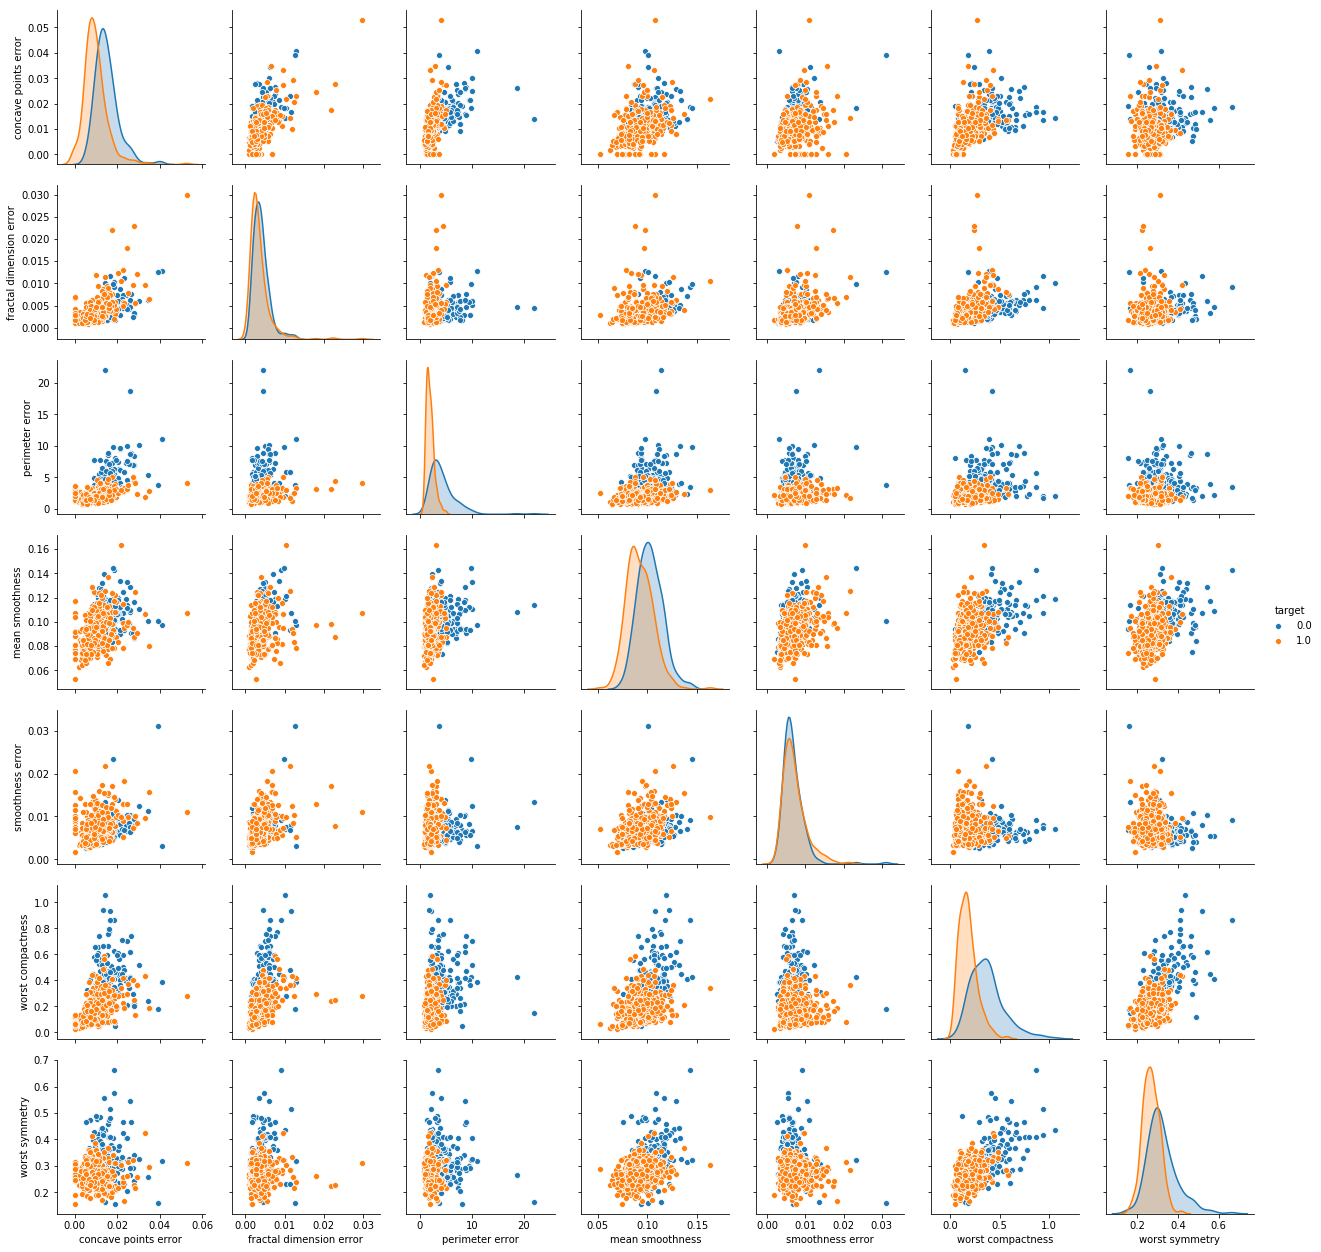

In [27]:
#picked the 7 LEAST important features via RamdomForest
sns.pairplot(df_cancer, hue = 'target', vars = ['concave points error', 'fractal dimension error', 'perimeter error',
                                            'mean smoothness','smoothness error','worst compactness','worst symmetry'])
